#### Importing the necessary libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()                                             # will plot the matplotlib plots with seaborn theme
from jupyterthemes import jtplot
jtplot.style(theme='monokai', ticks=True, grid=True)  # just to set the dark mode for plot

from sklearn.cluster import KMeans

In [19]:
# data consists of some contries, their geographical location and language spoken.

data = pd.read_csv('Country clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


#### Plotting the data

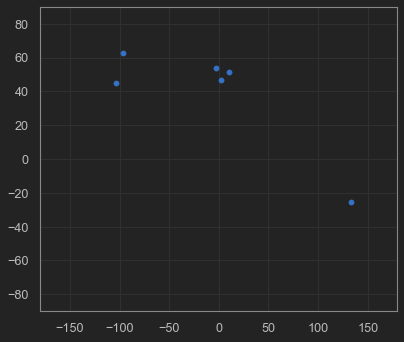

In [20]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### Selecting the features
#### First we will do clustering based on location

In [24]:
X = data.iloc[:,1:3]
X

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


#### Clustering

In [64]:
kmeans = KMeans(2) # KMeans on the right hand side is the K means method we imported from sklearn.
# 2 = number of clusters. Changing it to 3 will result in 3 different clusters

In [65]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### Clustering results

In [66]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([0, 0, 0, 0, 0, 1], dtype=int32)

In [67]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


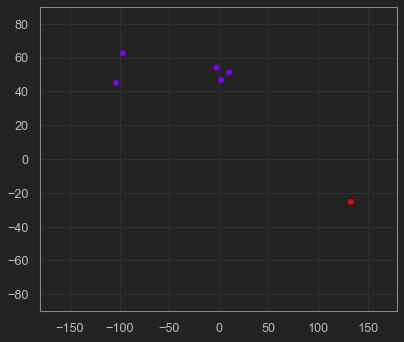

In [68]:
plt.scatter(data['Longitude'], data['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### Clustering categorical data
#### In this case: Language

In [70]:
# mapping the data. This is not the optimal way to do it, but will for now.
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0, 'French':1, 'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [83]:
X = data_mapped.iloc[:,3:4]
X

,Language
0,0
1,0
2,1
3,0
4,2
5,0


In [85]:
kmeans = KMeans(2) # KMeans on the right hand side is the K means method we imported from sklearn.
# 2 = number of clusters. Changing it to 3 will result in 3 different clusters

In [86]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [87]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([1, 1, 0, 1, 0, 1], dtype=int32)

In [88]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


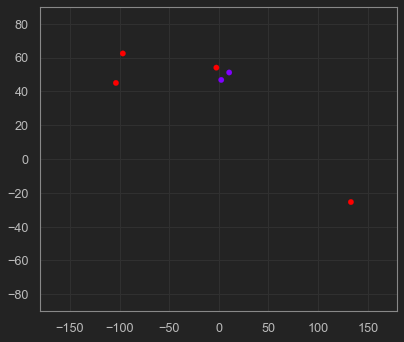

In [89]:
plt.scatter(data['Longitude'], data['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

We can also use both categorical and numerical data to do the cluster analysis.

In [91]:
X = data_mapped.iloc[:,1:4]
X

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [92]:
kmeans = KMeans(2)

In [93]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [95]:
identifies_clusters = kmeans.fit_predict(X)
identified_clusters

array([1, 1, 0, 1, 0, 1], dtype=int32)

In [96]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


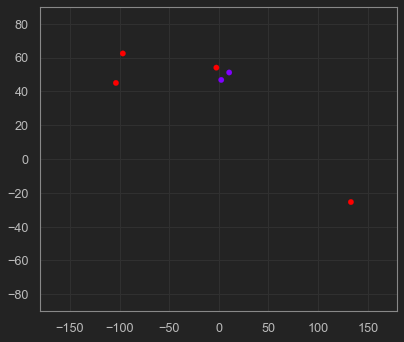

In [97]:
plt.scatter(data['Longitude'], data['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### The Elbow Method:
To determine the optimum number of clusters

### WCSS (within cluster sum of squares)

In [98]:
kmeans.inertia_

13208.95812

In [103]:
wcss = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

[42605.41356666667,
 13208.95812,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

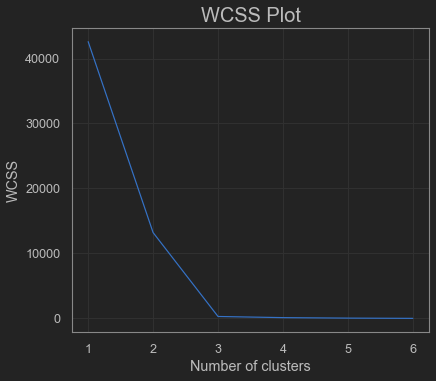

In [104]:
num_clusters = range(1,7)
plt.plot(num_clusters, wcss)
plt.title('WCSS Plot',size=20)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimum number of clusters is 3, and 2 is the sub optimal solution.